In [2]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
import pickle, gzip, urllib.request, json

In [3]:
#To ensure reproducibility
random.seed(11)
np.random.seed(11)

In [4]:
# Load the dataset
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

# Get the data into arrays
images = train_set[0]
labels = train_set[1]

# Put aside an array for the patterns
patterns = np.zeros((10,784))
    
# Set aside one image per class to store (10 images in total)
for category in range(10):
    inclass = [i for i in range(labels.shape[0]) if labels[i] == category]
    patterns[category,:] = 1.0*(images[inclass[random.randint(0,len(inclass))],:] > 0)

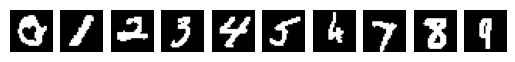

In [5]:
#Plot the patterns we're going to store
fig, axs = plt.subplots(1,10)
for c in range(10):
    axs[c].imshow(patterns[c,:].reshape((28,28)), cmap='gray')
    axs[c].axis("off")
plt.show()

In [6]:
class hopfield_network(object):
    """
    Define a class for a Hopfield network here.
    You must also define the functions below, but you can add additional arguments, etc.
    Also, note that you are welcome to write your own helper functions. 
    Reminder: you should use numpy functions for vector and matrix operations. No autograd!
    """
    
    # The initialization function for the hopfield network
    def __init__(self,N):
        """
        Comment!!!! Your marks depend on it!
        
        Notes: 
         - N is the number of units
         - You must have a variable 'state' that represents the current network state
        """
        
        # the current state of the network
        self.state = np.zeros((N,))
    
    # The function for setting the activity state of the network
    def set_state(self,activity):
        """
        set_state(activity)
        
        Sets the state of the network to the pattern given by activity.
        
        You do not need to change this function.
        """
        
        # set the state to activity
        self.state = activity
        
    # The function for updating the state of the network
    def update(self):
        """
        Comment!!!! Your marks depend on it!
        """
    
        # remove this, it is just a temporary line of code for me to test the backbone
        self.state = random.rand(self.state.shape[0])
        
        # return the state for easy storage
        return self.state
    
    # The function for storing one image at a time
    def store_one(self,image):
        """
        Comment!!!! Your marks depend on it!
        """
    
    # The function for storing multiple images in one shot
    def store_multi(self,images):
        """
        Comment!!!! Your marks depend on it!
        """

In [7]:
# Some helper functions for generating test images

# The function for generating a noisy version of an image
def image_noise(image,noise_level=0.1):
    """
    new_image = test_noise(image)
        
    This function takes an image, adds noise to it, and returns it. 

    noise_level - between 0-1, try experimenting with this

    """
    
    # create a mask for adding noise to the image
    image_mask = random.uniform(size=image.shape) < noise_level
    
    return np.logical_xor(image,image_mask)
    
# The function for generating a combo of two images
def image_combo(image1,image2,image1_weight=0.5):
    """
    newimage = test_combo(image1,image2)
        
    This function takes a pair of images, combines them, and returns the result.
    
    image1_weight - between 0-1, try experimenting with this

    """
    
    # create a mask for mixing the images
    image1_mask = random.uniform(size=image1.shape) < image1_weight
        
    return image1_mask*image1 + (1-image1_mask)*image2

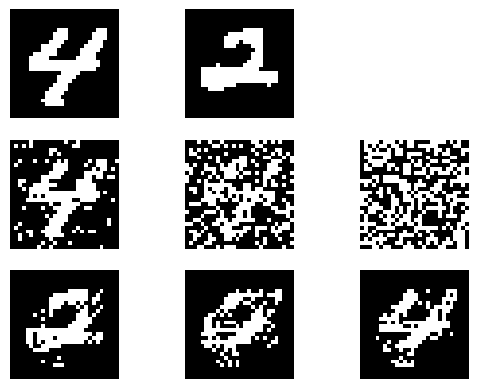

In [8]:
# Test the helper functions to make sure they work

# Pick some random images
image1 = patterns[random.randint(0,10)]
image2 = patterns[random.randint(0,10)]

# Create a little array for storage
test_images = np.zeros((2,3,784))

# Generate a series of noise images
test_images[0,0,:] = image_noise(image1)
test_images[0,1,:] = image_noise(image1,noise_level=0.3)
test_images[0,2,:] = image_noise(image1,noise_level=0.5)

# Generate a series of combo images
test_images[1,0,:] = image_combo(image1,image2,image1_weight=0.2)
test_images[1,1,:] = image_combo(image1,image2)
test_images[1,2,:] = image_combo(image1,image2,image1_weight=0.8)

# Plot the images, plus the originals on top
fig, axs = plt.subplots(3,3)
axs[0,0].imshow(image1.reshape((28,28)), cmap='gray')
axs[0,0].axis("off")
axs[0,1].imshow(image2.reshape((28,28)), cmap='gray')
axs[0,1].axis("off")
axs[0,2].axis("off")
for c in range(3):
    axs[1,c].imshow(test_images[0,c,:].reshape((28,28)), cmap='gray')
    axs[1,c].axis("off")
    axs[2,c].imshow(test_images[1,c,:].reshape((28,28)), cmap='gray')
    axs[2,c].axis("off")
plt.show()

In [9]:
# Create a Hopfield network and train it

one_pattern = True # flag for whether to store one pattern at a time

hnet = hopfield_network(784) # construct the network

if one_pattern:
    # Train the network to store all the patterns using your store_one function
    
    # this is just a place holder, you can remove it
    foo = 3
else:
    # Train the network to store all the patterns using your store_multi function 
    
    # this is just a place holder, you can remove it
    foo = 4

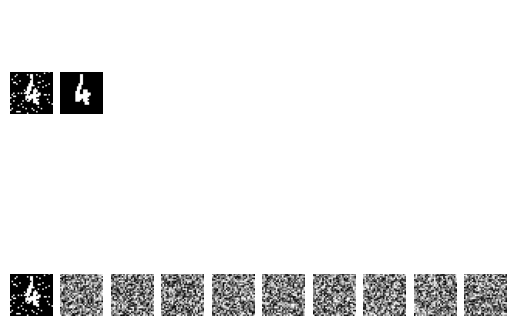

In [10]:
# Plot generated images from your Hopfield network as it updates after receiving an initial pattern that is
# a noisy version of an image that was stored

# number of time-steps to run the network for
numsteps = 10 # feel free to change this

# create an array for storing activity states over time
activity = np.zeros((numsteps,784))

# test using a noisy version of a random image
rand_image = patterns[random.randint(0,10),:]
activity[0,:] = image_noise(rand_image)
hnet.set_state(activity[0,:])
for t in range(numsteps-1):
    activity[t+1,:] = hnet.update()

# plot the results
fig, axs = plt.subplots(2,numsteps)
axs[0,0].imshow(activity[0,:].reshape((28,28)), cmap='gray')
axs[0,1].imshow(rand_image.reshape((28,28)), cmap='gray')
for c in range(numsteps):
    axs[1,c].imshow(activity[c,:].reshape((28,28)), cmap='gray')
    axs[0,c].axis("off")
    axs[1,c].axis("off")
plt.show()   

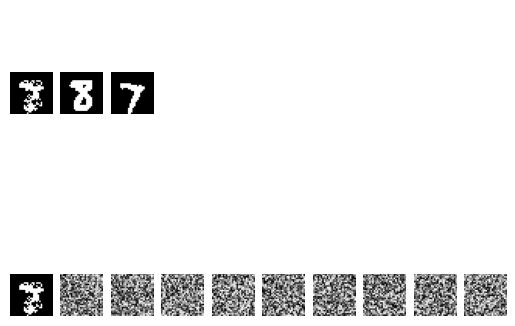

In [11]:
# Plot generated images from your Hopfield network as it updates after receiving an initial pattern that is
# a combination of two images that were stored

# number of time-steps to run the network for
numsteps = 10 # feel free to change this

# create an array for storing activity states over time
activity = np.zeros((numsteps,784))

# test using a combo of two random images
rand_image1 = patterns[random.randint(0,10),:]
rand_image2 = patterns[random.randint(0,10),:]
activity[0,:] = image_combo(rand_image1,rand_image2)
hnet.set_state(activity[0,:])
for t in range(numsteps-1):
    activity[t+1,:] = hnet.update()

# plot the results
fig, axs = plt.subplots(2,numsteps)
axs[0,0].imshow(activity[0,:].reshape((28,28)), cmap='gray')
axs[0,1].imshow(rand_image1.reshape((28,28)), cmap='gray')
axs[0,2].imshow(rand_image2.reshape((28,28)), cmap='gray')
for c in range(numsteps):
    axs[1,c].imshow(activity[c,:].reshape((28,28)), cmap='gray')
    axs[0,c].axis("off")
    axs[1,c].axis("off")
plt.show()        